In [2]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
print("hello")

hello


In [6]:
import os
print("current dir ",os.getcwd())
curr_dir=os.getcwd()
train_path=os.path.join(curr_dir,"Datasets","Train")
test_path=os.path.join(curr_dir,"Datasets","Test")
valid_path=os.path.join(curr_dir,"Datasets","Valid")
                       

current dir  d:\Potato-diseases-project


In [7]:
training_set=tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [8]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [10]:
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 528ms/step - accuracy: 0.3501 - loss: 1.3443 - val_accuracy: 0.6500 - val_loss: 0.8126
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 482ms/step - accuracy: 0.6066 - loss: 0.7948 - val_accuracy: 0.6533 - val_loss: 0.8769
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 476ms/step - accuracy: 0.7050 - loss: 0.6329 - val_accuracy: 0.6700 - val_loss: 0.8514
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 471ms/step - accuracy: 0.7077 - loss: 0.6360 - val_accuracy: 0.8500 - val_loss: 0.3559
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 481ms/step - accuracy: 0.8654 - loss: 0.3294 - val_accuracy: 0.8433 - val_loss: 0.3763
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 488ms/step - accuracy: 0.8624 - loss: 0.3282 - val_accuracy: 0.8800 - val_loss: 0.3066
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 500ms/step - accuracy: 0.9122 - loss: 0.2377 - val_accuracy: 0.6900 - val_loss: 0.7436
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 505ms/step - accuracy: 0.8645 - loss: 0.3572 - val_accu

In [13]:
train_loss,train_acc=cnn.evaluate(training_set)
print('Training accuracy:',train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.9696 - loss: 0.0988
Training accuracy: 0.9666666388511658


In [14]:
val_loss,val_acc=cnn.evaluate(validation_set)
print('Validaion accuracy:',val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.9310 - loss: 0.2090
Validaion accuracy: 0.9233333468437195


In [15]:
cnn.save('trained_plant_disease_model.keras')

In [16]:
training_history.history

{'accuracy': [0.40666666626930237,
  0.6611111164093018,
  0.75,
  0.7644444704055786,
  0.8700000047683716,
  0.8722222447395325,
  0.894444465637207,
  0.9011111259460449,
  0.9222221970558167,
  0.9599999785423279],
 'loss': [1.162463665008545,
  0.7059465050697327,
  0.5523507595062256,
  0.540012001991272,
  0.320733904838562,
  0.3030588924884796,
  0.27195078134536743,
  0.2688404619693756,
  0.19452466070652008,
  0.09748457372188568],
 'val_accuracy': [0.6499999761581421,
  0.653333306312561,
  0.6700000166893005,
  0.8500000238418579,
  0.8433333039283752,
  0.8799999952316284,
  0.6899999976158142,
  0.9133333563804626,
  0.9266666769981384,
  0.9233333468437195],
 'val_loss': [0.8126465082168579,
  0.8768796920776367,
  0.8514140844345093,
  0.3558659255504608,
  0.37627747654914856,
  0.3065681457519531,
  0.7435925006866455,
  0.15279041230678558,
  0.16481447219848633,
  0.2450312227010727]}

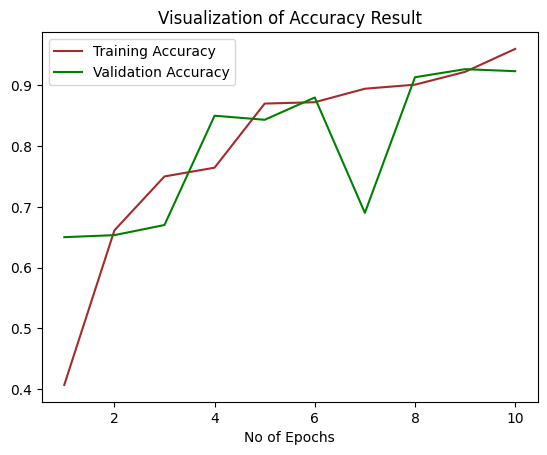

In [17]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()